# Ice cover anomalies

Ice data is slow, might take a while.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

import IPython.display
import cmocean as cm
import cartopy.crs as ccrs
from xhistogram.xarray import histogram
import pandas as pd
import cosima_cookbook as cc
from collections import OrderedDict
from datetime import timedelta

In [2]:
from dask.distributed import Client
client = Client(n_workers=4)
client

Client Scheduler: tcp://127.0.0.1:43683 Dashboard: /proxy/36747/status,Cluster Workers: 4 Cores: 8 Memory: 34.36 GB


In [5]:
session = cc.database.create_session('/scratch/e14/cy8964/access-om2/archive/databases/1deg_jra55_ryf_experiments_2.db')

In [6]:
expt = '1deg_jra55_ryf_RCPcont'

var = cc.querying.getvar(expt, 'aice_m', session, decode_coords=False)

In [7]:
var['time'] = var.time - timedelta(hours=12)

In [8]:
area_t = cc.querying.getvar(expt, 'area_t', session, n=-1)

In [9]:
area_t = cc.querying.getvar(expt, 'area_t',session,n=1)
var.coords['ni'] = area_t['xt_ocean'].values
var.coords['nj'] = area_t['yt_ocean'].values
var = var.rename(({'ni':'xt_ocean', 'nj':'yt_ocean'}))
area = var*area_t

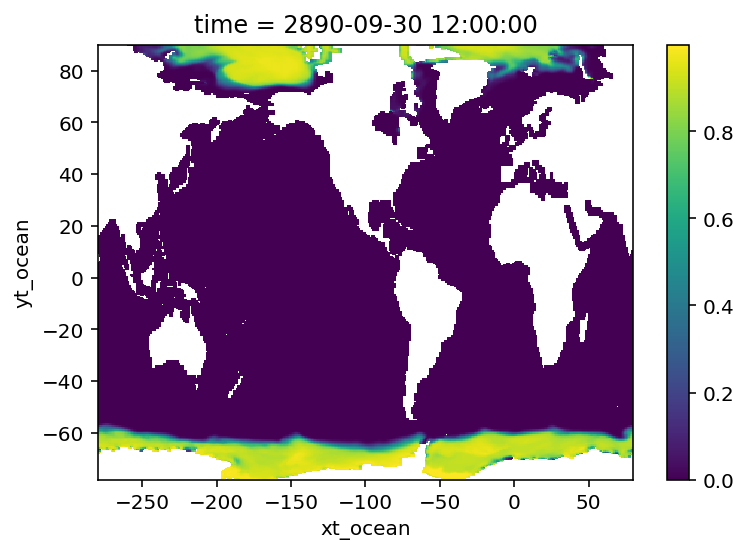

In [10]:
(area/area_t).isel(time = 8).plot()

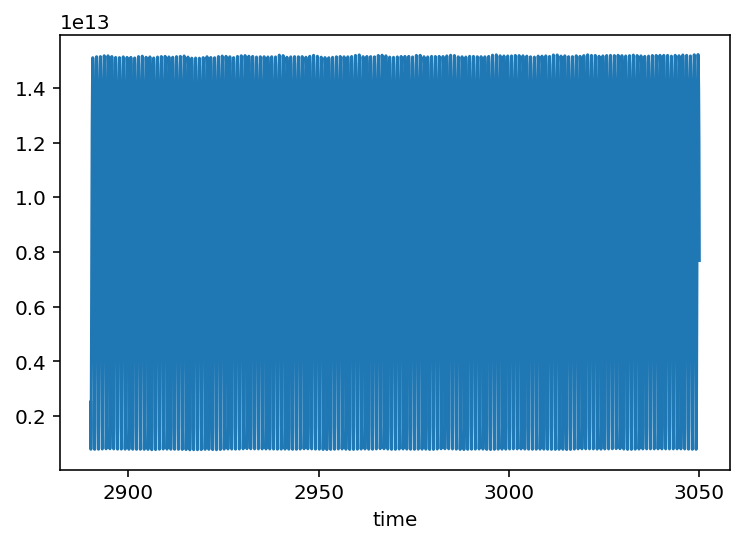

In [11]:
area_zonalsum = area.sum('xt_ocean')
SH_area = area_zonalsum.sel(yt_ocean=slice(-90, -45)).sum('yt_ocean').load()
NH_area = area_zonalsum.sel(yt_ocean=slice(0, 90)).sum('yt_ocean').load()
SH_area.plot()

In [35]:
expt = '1deg_jra55_ryf_RCPwarmhumid'

var = cc.querying.getvar(expt, 'aice_m', session, decode_coords=False)
var['time'] = var.time - timedelta(hours=12)
area_t = cc.querying.getvar(expt, 'area_t',session,n=1)
var.coords['ni'] = area_t['xt_ocean'].values
var.coords['nj'] = area_t['yt_ocean'].values
var = var.rename(({'ni':'xt_ocean', 'nj':'yt_ocean'}))
areaw = var*area_t
area_zonalsum = areaw.sum('xt_ocean')
SH_area_warm = area_zonalsum.sel(yt_ocean=slice(-90, -45)).sum('yt_ocean').load()
NH_area_warm = area_zonalsum.sel(yt_ocean=slice(0, 90)).sum('yt_ocean').load()


In [36]:
expt = '1deg_jra55_ryf_RCPcoolhumid'

var = cc.querying.getvar(expt, 'aice_m', session, decode_coords=False)
var['time'] = var.time - timedelta(hours=12)
area_t = cc.querying.getvar(expt, 'area_t',session,n=1)
var.coords['ni'] = area_t['xt_ocean'].values
var.coords['nj'] = area_t['yt_ocean'].values
var = var.rename(({'ni':'xt_ocean', 'nj':'yt_ocean'}))
areac = var*area_t
area_zonalsum = areac.sum('xt_ocean')
SH_area_cool = area_zonalsum.sel(yt_ocean=slice(-90, -45)).sum('yt_ocean').load()
NH_area_cool = area_zonalsum.sel(yt_ocean=slice(0, 90)).sum('yt_ocean').load()


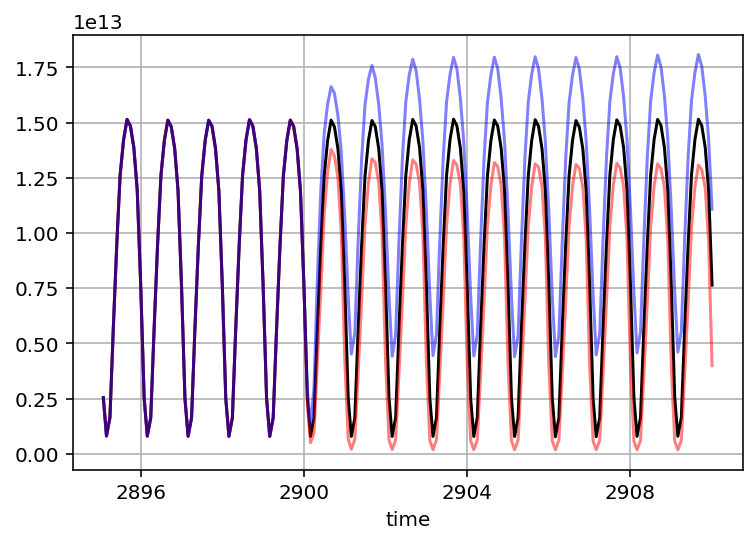

In [37]:
fig=plt.figure()
SH_area.sel(time = slice('2895-01-01','2910-01-01')).plot(color = 'k')
SH_area_warm.sel(time = slice('2895-01-01','2910-01-01')).plot(color = 'r', alpha = 0.5)
SH_area_cool.sel(time = slice('2895-01-01','2910-01-01')).plot(color = 'b', alpha = 0.5)
plt.grid()

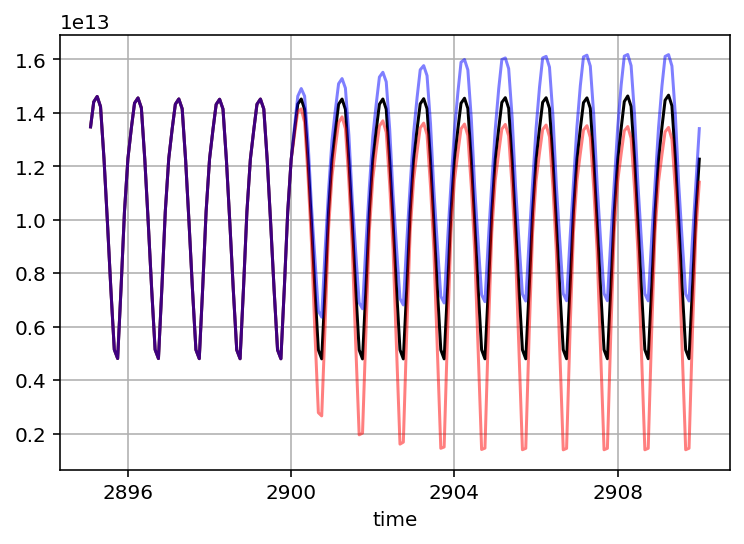

In [38]:
fig=plt.figure()
NH_area.sel(time = slice('2895-01-01','2910-01-01')).plot(color = 'k')
NH_area_warm.sel(time = slice('2895-01-01','2910-01-01')).plot(color = 'r', alpha = 0.5)
NH_area_cool.sel(time = slice('2895-01-01','2910-01-01')).plot(color = 'b', alpha = 0.5)
plt.grid()

^^ nearly all the ice melts in summer

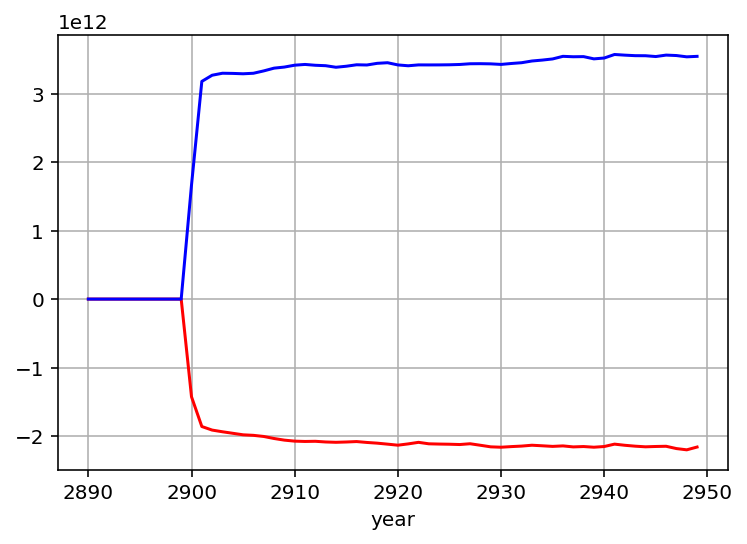

In [39]:
fig=plt.figure()
(SH_area_warm-SH_area).groupby('time.year').mean('time').plot(color = 'r')
#(SH_area_warm-SH_area).plot(color = 'r', alpha = 0.5)
(SH_area_cool-SH_area).groupby('time.year').mean('time').plot(color = 'b')
#(SH_area_cool-SH_area).plot(color = 'b',alpha = 0.5)
plt.grid()
plt.savefig('southernice')

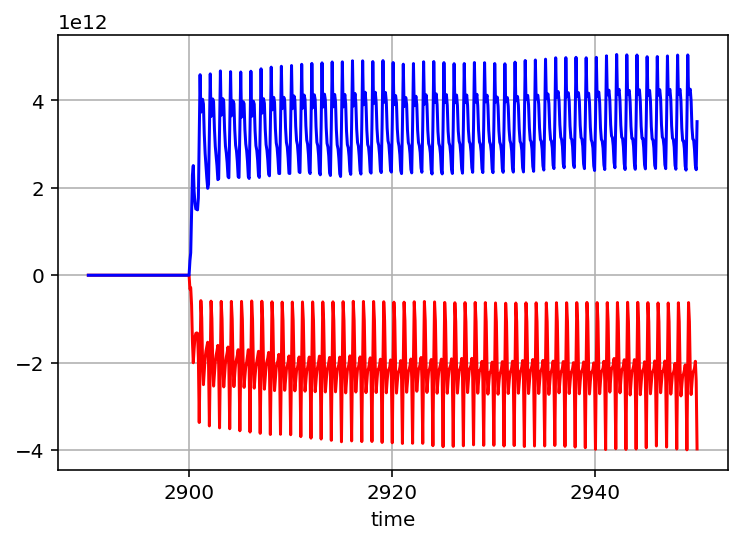

In [40]:
fig=plt.figure()
#(SH_area_warm-SH_area).groupby('time.year').mean('time').plot(color = 'r')
(SH_area_warm-SH_area).plot(color = 'r')
#(SH_area_cool-SH_area).groupby('time.year').mean('time').plot(color = 'b')
(SH_area_cool-SH_area).plot(color = 'b')
plt.grid()

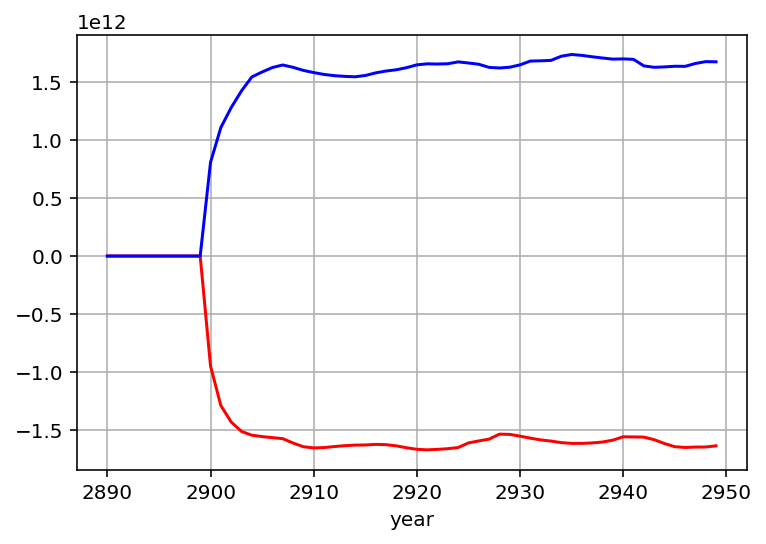

In [41]:
fig=plt.figure()
(NH_area_warm-NH_area).groupby('time.year').mean('time').plot(color = 'r')
#(NH_area_warm-NH_area).plot(color = 'r', alpha = 0.5)
(NH_area_cool-NH_area).groupby('time.year').mean('time').plot(color = 'b')
#(NH_area_cool-NH_area).plot(color = 'b',alpha = 0.5)
plt.grid()

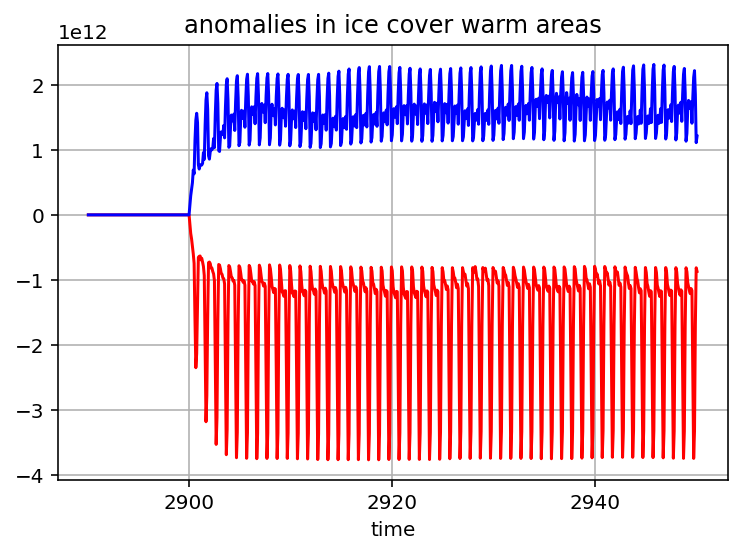

In [42]:
fig=plt.figure()
#(NH_area_warm-NH_area).groupby('time.year').mean('time').plot(color = 'r')
(NH_area_warm-NH_area).plot(color = 'r')
#(NH_area_cool-NH_area).groupby('time.year').mean('time').plot(color = 'b')
(NH_area_cool-NH_area).plot(color = 'b')
plt.grid()
plt.title('anomalies in ice cover warm areas')
plt.savefig('northernice')

can see a much larger summer ice cover anomaly in the warming case. this means a lot of the ice melts in summer. more ice has melted in winter, but the difference isn't as big.

Text(0.5, 1.0, 'anomalies in ice cover area')

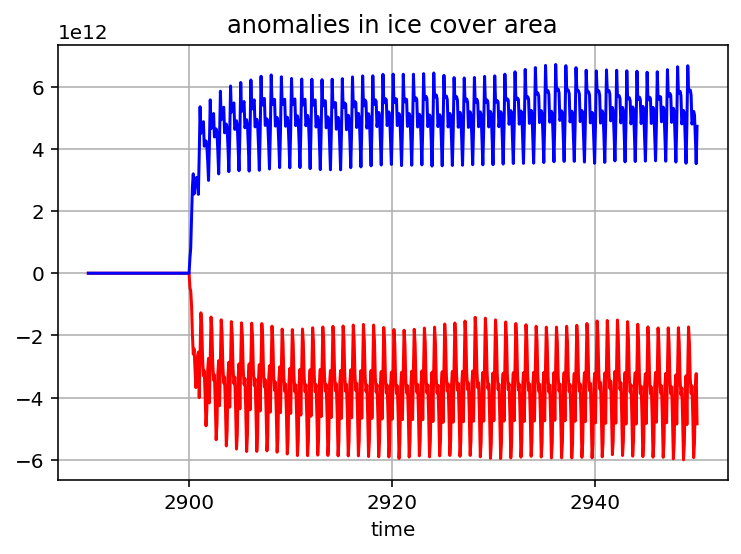

In [43]:
fig=plt.figure()
#(NH_area_warm-NH_area).groupby('time.year').mean('time').plot(color = 'r')
(NH_area_warm+SH_area_warm-NH_area-SH_area).plot(color = 'r')
#(NH_area_cool-NH_area).groupby('time.year').mean('time').plot(color = 'b')
(NH_area_cool+SH_area_cool-NH_area-SH_area).plot(color = 'b')
plt.grid()
plt.title('anomalies in ice cover area')

# Nice map of ice cover using cartopy

In [12]:


import cartopy.feature as cft
land_50m = cft.NaturalEarthFeature('physical', 'land', '50m',
                                   edgecolor='black', facecolor='gray', linewidth=0.5)



In [13]:
expt = '1deg_jra55_ryf_RCPcoolhumid'
var = cc.querying.getvar(expt, 'aice_m', session, decode_coords=False)
var['time'] = var.time - timedelta(hours=12)
area_t = cc.querying.getvar(expt, 'area_t',session,n=1)
var.coords['ni'] = area_t['xt_ocean'].values
var.coords['nj'] = area_t['yt_ocean'].values
var = var.rename(({'ni':'xt_ocean', 'nj':'yt_ocean'}))
area_cool = var*area_t

In [14]:
expt = '1deg_jra55_ryf_RCPwarmhumid'
var = cc.querying.getvar(expt, 'aice_m', session, decode_coords=False)
var['time'] = var.time - timedelta(hours=12)
area_t = cc.querying.getvar(expt, 'area_t',session,n=1)
var.coords['ni'] = area_t['xt_ocean'].values
var.coords['nj'] = area_t['yt_ocean'].values
var = var.rename(({'ni':'xt_ocean', 'nj':'yt_ocean'}))
area_warm = var*area_t

In [15]:
expt = '1deg_jra55_ryf_RCPcont'
var = cc.querying.getvar(expt, 'aice_m', session, decode_coords=False)
var['time'] = var.time - timedelta(hours=12)
area_t = cc.querying.getvar(expt, 'area_t',session,n=1)
var.coords['ni'] = area_t['xt_ocean'].values
var.coords['nj'] = area_t['yt_ocean'].values
var = var.rename(({'ni':'xt_ocean', 'nj':'yt_ocean'}))
area = var*area_t

In [47]:
area

<xarray.DataArray (time: 720, yt_ocean: 300, xt_ocean: 360)>
dask.array<mul, shape=(720, 300, 360), dtype=float32, chunksize=(1, 300, 360), chunktype=numpy.ndarray>
Coordinates:
  * time      (time) object 2890-01-31 12:00:00 ... 2949-12-31 12:00:00
  * xt_ocean  (xt_ocean) float64 -279.5 -278.5 -277.5 -276.5 ... 77.5 78.5 79.5
  * yt_ocean  (yt_ocean) float64 -77.88 -77.63 -77.38 ... 88.87 89.32 89.77
    geolon_t  (yt_ocean, xt_ocean) float32 dask.array<chunksize=(300, 360), meta=np.ndarray>
    geolat_t  (yt_ocean, xt_ocean) float32 dask.array<chunksize=(300, 360), meta=np.ndarray>

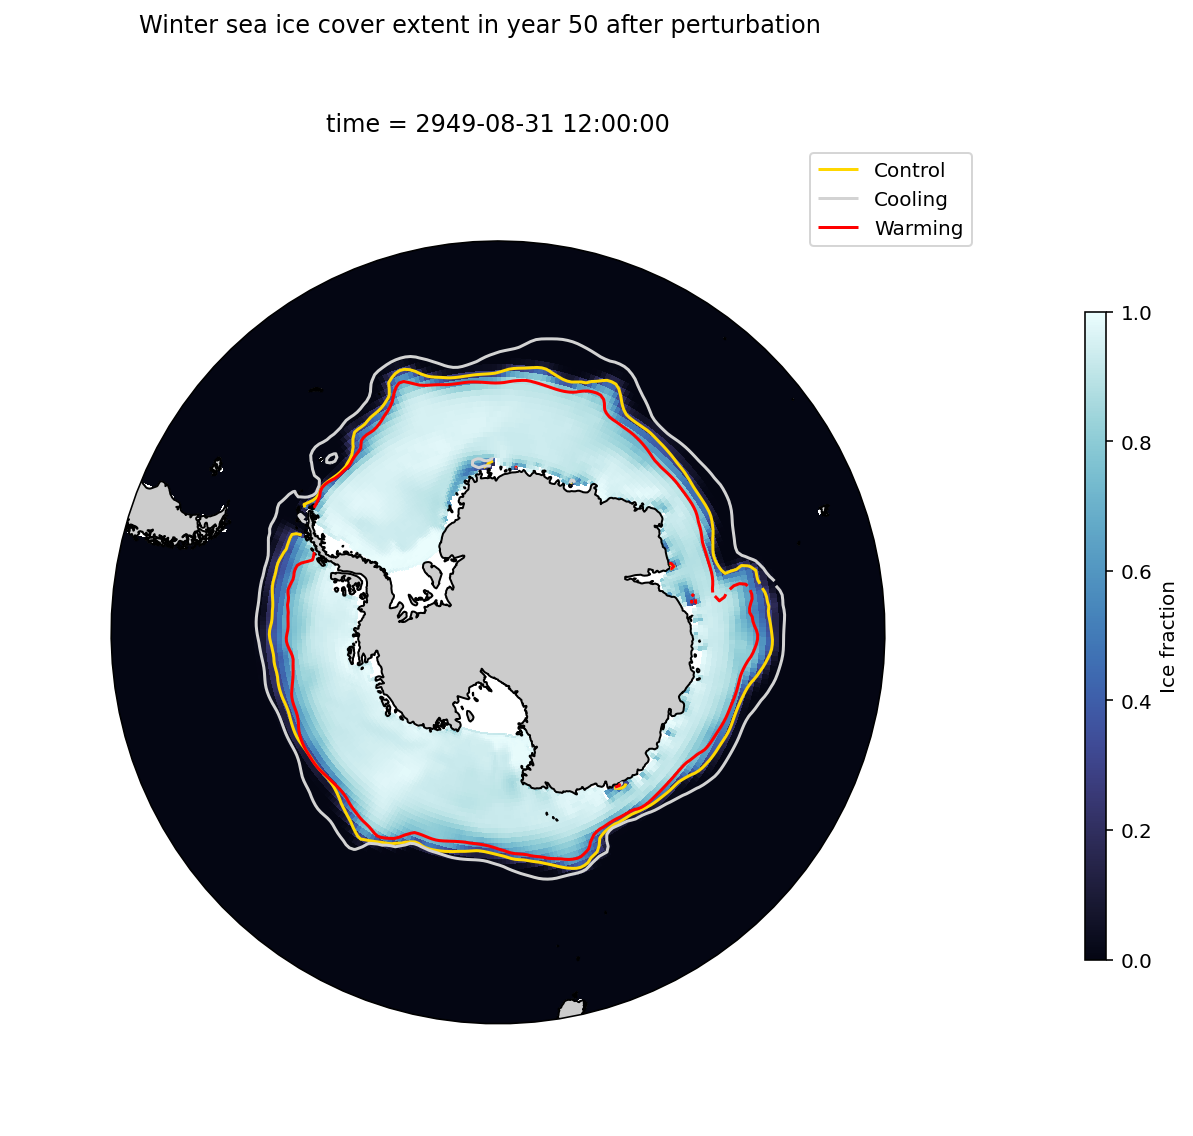

In [48]:
import matplotlib.path as mpath

projection=ccrs.SouthPolarStereo()

fig = plt.figure(figsize=(10, 9))
ax = plt.subplot(1, 1, 1, projection=projection)
plt.suptitle('Winter sea ice cover extent in year 50 after perturbation')
ax.set_extent([-280, 80, -80, -35], crs=ccrs.PlateCarree())
ax.add_feature(land_50m, color=[0.8, 0.8, 0.8])
ax.coastlines(resolution='50m')

# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.4
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)


p1 = ((area/area_t).isel(time = 715)).plot.pcolormesh(x='xt_ocean', y='yt_ocean', add_colorbar=False, vmin=0, vmax=1, cmap=cm.cm.ice, transform=ccrs.PlateCarree())
p2 = ((area/area_t).isel(time = 715)).plot.contour(x='xt_ocean', y='yt_ocean', levels=np.array([0.3]),  colors = 'gold', transform=ccrs.PlateCarree())
p3 = ((area_cool/area_t).isel(time = 715)).plot.contour(x='xt_ocean', y='yt_ocean', levels=np.array([0.3]),  colors = 'lightgrey', transform=ccrs.PlateCarree())
p4 = ((area_warm/area_t).isel(time = 715)).plot.contour(x='xt_ocean', y='yt_ocean', levels=np.array([0.3]),  colors = 'r', transform=ccrs.PlateCarree())

h1,_ = p2.legend_elements()
h2,_ = p3.legend_elements()
h3,_ = p4.legend_elements()

ax.legend([h1[0], h2[0],h3[0]], ['Control', 'Cooling','Warming'])

ax_cb = plt.axes([0.92, 0.25, 0.015, 0.5])
cb = plt.colorbar(p1,cax=ax_cb, orientation='vertical')
cb.ax.set_ylabel('Ice fraction');
#plt.savefig('Icecover', bbox_inches='tight')

In [16]:
temp_control = cc.querying.getvar('RYF.t_10.1990_1991.nc', 'tas_10m', session)
temp_month = temp_control.groupby('time.month').mean('time')

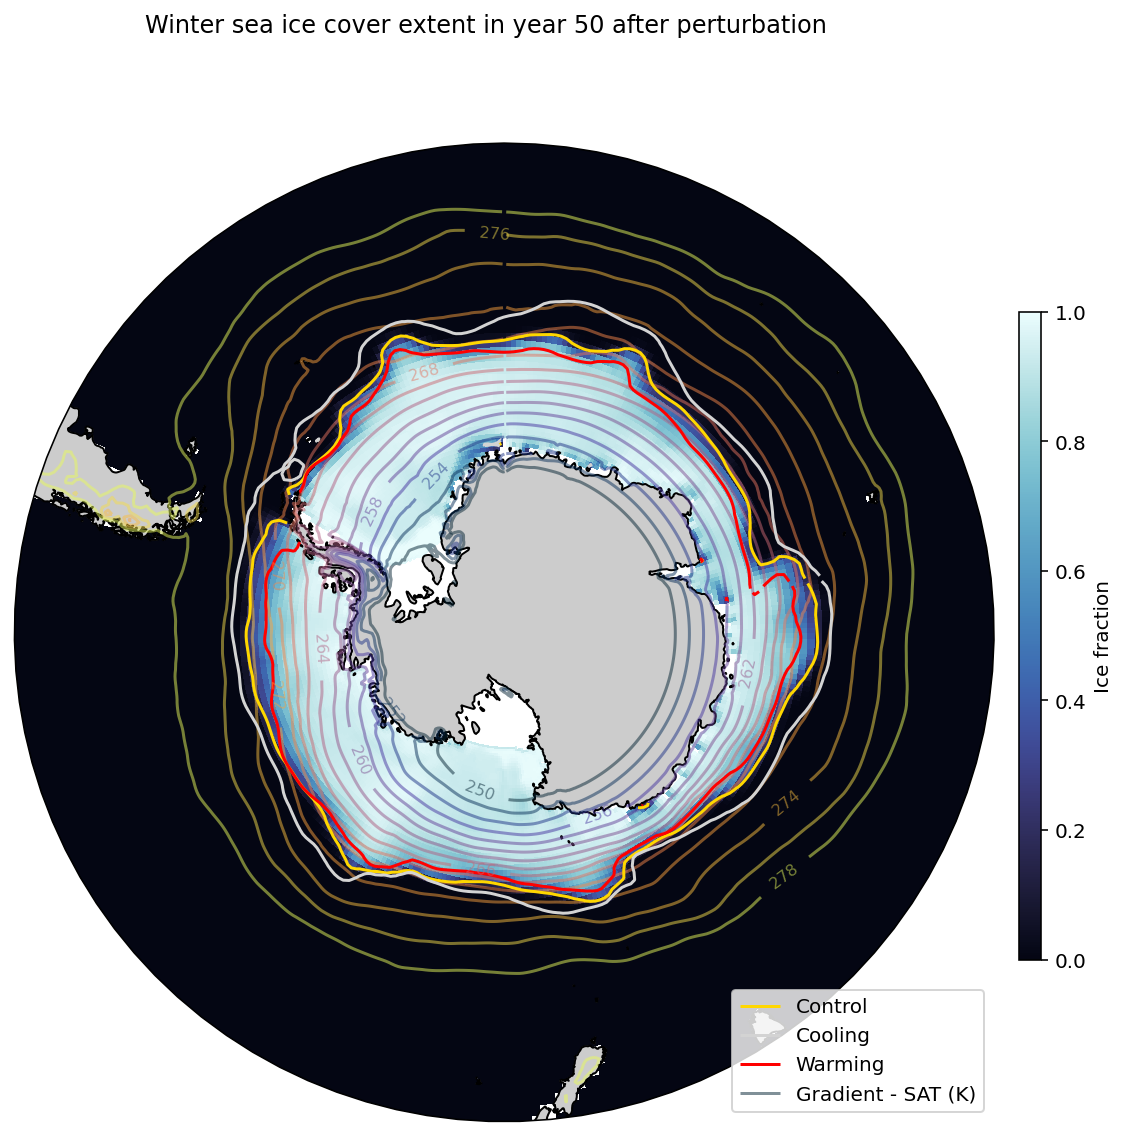

In [17]:
import matplotlib.path as mpath

projection=ccrs.SouthPolarStereo()

fig = plt.figure(figsize=(10, 9))
ax = plt.subplot(1, 1, 1, projection=projection)
plt.suptitle('Winter sea ice cover extent in year 50 after perturbation')
ax.set_extent([-280, 80, -80, -40], crs=ccrs.PlateCarree())
ax.add_feature(land_50m, color=[0.8, 0.8, 0.8])
ax.coastlines(resolution='50m')

# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)


p1 = ((area/area_t).isel(time = 715)).plot.pcolormesh(x='xt_ocean', y='yt_ocean', add_colorbar=False, vmin=0, vmax=1, cmap=cm.cm.ice, transform=ccrs.PlateCarree())
line_c = temp_month.isel(month=8).plot.contour(x='longitude', y='latitude', levels=np.arange(250,280,2), cmap = 'cmo.thermal',transform=ccrs.PlateCarree(), linewidth = 0.25, alpha = 0.5)
ax.clabel(
        line_c,  # Typically best results when labelling line contours.
        manual=False,  # Automatic placement vs manual placement.
        inline=True,  # Cut the line where the label will be placed.
        fmt=' {:.0f} '.format,
        fontsize = 8# Labes as integers, with some extra space.
    )
p2 = ((area/area_t).isel(time = 715)).plot.contour(x='xt_ocean', y='yt_ocean', levels=np.array([0.2]),  colors = 'gold', transform=ccrs.PlateCarree())
p3 = ((area_cool/area_t).isel(time = 715)).plot.contour(x='xt_ocean', y='yt_ocean', levels=np.array([0.2]),  colors = 'lightgrey', transform=ccrs.PlateCarree())
p4 = ((area_warm/area_t).isel(time = 715)).plot.contour(x='xt_ocean', y='yt_ocean', levels=np.array([0.2]),  colors = 'r', transform=ccrs.PlateCarree())

h1,_ = p2.legend_elements()
h2,_ = p3.legend_elements()
h3,_ = p4.legend_elements()
h4,_ = line_c.legend_elements()


ax.legend([h1[0], h2[0],h3[0],h4[0]], ['Control', 'Cooling','Warming','Gradient - SAT (K)'], loc = 'lower right')
ax.set_title('')

ax_cb = plt.axes([0.87, 0.25, 0.015, 0.5])
cb = plt.colorbar(p1,cax=ax_cb, orientation='vertical')
cb.ax.set_ylabel('Ice fraction');

plt.savefig('Icecover', bbox_inches='tight', dpi = 600)

In [ ]:
import matplotlib.path as mpath

projection=ccrs.NorthPolarStereo()

fig = plt.figure(figsize=(10, 9))
ax = plt.subplot(1, 1, 1, projection=projection)
plt.suptitle('Winter sea ice cover extent in year 50 after perturbation')
ax.set_extent([-280, 80, 40, 90], crs=ccrs.PlateCarree())
ax.add_feature(land_50m, color=[0.8, 0.8, 0.8])
ax.coastlines(resolution='50m')

# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)


p1 = ((area/area_t).isel(time = 708)).plot.pcolormesh(x='xt_ocean', y='yt_ocean', add_colorbar=False, vmin=0, vmax=1, cmap=cm.cm.ice, transform=ccrs.PlateCarree())
line_c = temp_month.isel(month=1).plot.contour(x='longitude', y='latitude', levels=np.arange(244,280,2), cmap = 'cmo.thermal',transform=ccrs.PlateCarree(), linewidth = 0.25, alpha = 0.5)
ax.clabel(
        line_c,  # Typically best results when labelling line contours.
        manual=False,  # Automatic placement vs manual placement.
        inline=True,  # Cut the line where the label will be placed.
        fmt=' {:.0f} '.format,
        fontsize = 8# Labes as integers, with some extra space.
    )
p2 = ((area/area_t).isel(time = 708)).plot.contour(x='xt_ocean', y='yt_ocean', levels=np.array([0.2]),  colors = 'gold', transform=ccrs.PlateCarree())
p3 = ((area_cool/area_t).isel(time = 708)).plot.contour(x='xt_ocean', y='yt_ocean', levels=np.array([0.2]),  colors = 'lightgrey', transform=ccrs.PlateCarree())
p4 = ((area_warm/area_t).isel(time = 708)).plot.contour(x='xt_ocean', y='yt_ocean', levels=np.array([0.2]),  colors = 'r', transform=ccrs.PlateCarree())

h1,_ = p2.legend_elements()
h2,_ = p3.legend_elements()
h3,_ = p4.legend_elements()
h4,_ = line_c.legend_elements()


ax.legend([h1[0], h2[0],h3[0],h4[0]], ['Control', 'Cooling','Warming','Gradient - SAT (K)'], loc = 'lower right')
ax.set_title('')

ax_cb = plt.axes([0.87, 0.25, 0.015, 0.5])
cb = plt.colorbar(p1,cax=ax_cb, orientation='vertical')
cb.ax.set_ylabel('Ice fraction');

plt.savefig('Icecover', bbox_inches='tight', dpi = 600)